# Exploring the MNIST Digits Dataset

## Installing dependencies

In [1]:
import sys

#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install --upgrade numpy pandas matplotlib tensorflow keras minio

print(sys.executable)

C:\Users\jonat\anaconda3\python.exe


## Importing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Exploring Data

In [5]:
# check the shape of the data

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


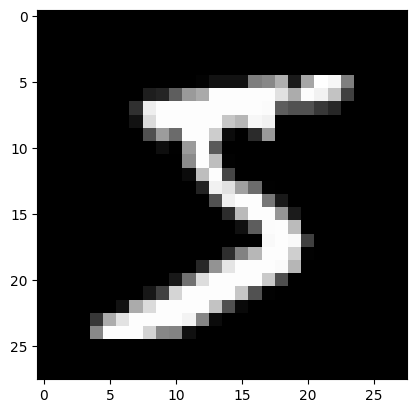

correct number: 5


In [12]:
img_no = 0 #change the number to display other examples

first_number = x_train[img_no]
plt.imshow(first_number, cmap='gray') # visualize the numbers in gray mode
plt.show()
print(f"correct number: {y_train[img_no]}")

## Preparing Data & Splitting

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


## Model Building

In [10]:
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

with tf.device("/device:GPU:0"):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D(2, 2))

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPool2D(2, 2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))

    model.add(keras.layers.Dense(32, activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax')) #output are 10 classes, numbers from 0-9

    #show model summary - how it looks
    model.summary()

    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

## Model Evaluation

In [11]:
keras.models.save_model(model, "models/detect-digits")

INFO:tensorflow:Assets written to: models/detect-digits\assets


INFO:tensorflow:Assets written to: models/detect-digits\assets


In [14]:
model1 = keras.models.load_model("models/detect-digits")

In [15]:
model_loss, model_accuracy = model1.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0579 - accuracy: 0.9840


313/313 [==============================] - 2s 6ms/step


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

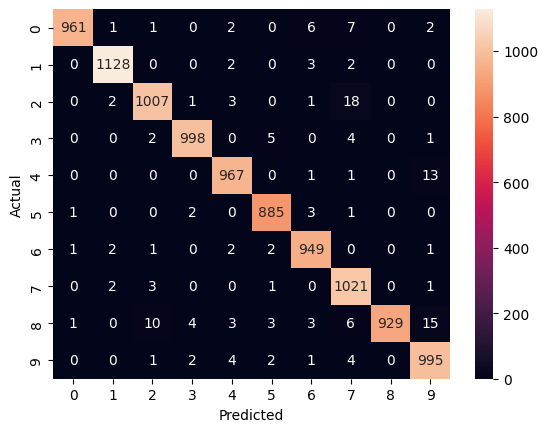

In [17]:
# Confusion Matrix

# Generates output predictions for the input samples.
test_predictions = model1.predict(x=x_test)

# Returns the indices of the maximum values along an axis.
test_predictions = np.argmax(test_predictions,axis=1) # the prediction outputs 10 values, we take the index number of the highest value, which is the prediction of the model

# generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predictions)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
h = sns.heatmap(confusion_matrix,annot=True,fmt='d')
h.set(xlabel='Predicted', ylabel='Actual')